In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)
# reflect the tables

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
session = Session(bind=engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Sort the dataframe by date
date_vs_prec = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date>"2016-08-23").\
        order_by(measurement.date).all()
date_vs_prec

-11', 0.3),
 ('2016-09-11', 0.6),
 ('2016-09-12', 0.0),
 ('2016-09-12', 0.04),
 ('2016-09-12', None),
 ('2016-09-12', None),
 ('2016-09-12', 0.15),
 ('2016-09-12', 0.31),
 ('2016-09-12', 1.04),
 ('2016-09-13', 0.02),
 ('2016-09-13', 0.37),
 ('2016-09-13', 0.32),
 ('2016-09-13', None),
 ('2016-09-13', 0.46),
 ('2016-09-13', 0.34),
 ('2016-09-13', 1.2),
 ('2016-09-14', 1.32),
 ('2016-09-14', 0.9),
 ('2016-09-14', 1.84),
 ('2016-09-14', None),
 ('2016-09-14', 1.19),
 ('2016-09-14', 2.33),
 ('2016-09-14', 6.7),
 ('2016-09-15', 0.42),
 ('2016-09-15', 0.12),
 ('2016-09-15', 0.07),
 ('2016-09-15', None),
 ('2016-09-15', 0.17),
 ('2016-09-15', 0.83),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.06),
 ('2016-09-16', 0.01),
 ('2016-09-16', 0.07),
 ('2016-09-16', 0.0),
 ('2016-09-16', 0.01),
 ('2016-09-16', 0.06),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.05),
 ('2016-09-17', 0.04),
 ('2016-09-17', 0.0),
 ('2016-09-17', 0.36),
 ('2016-09-17', 0.23),
 ('2016-09-18', 0.0),
 ('2016-09-18', 0.0),
 ('2016-

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(date_vs_prec)
prec_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


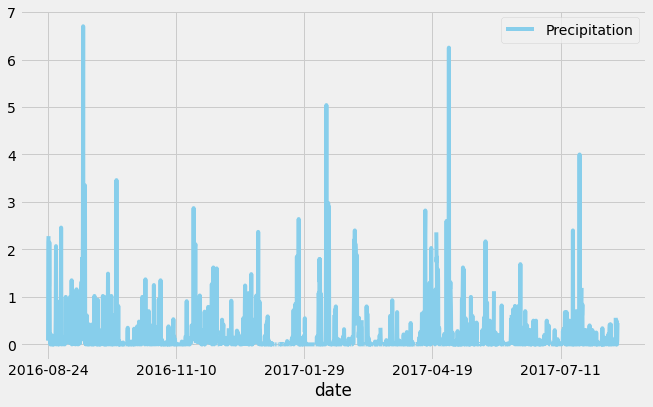

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
prec_df.plot(x="date", y="prcp", kind="line", figsize=(10,6),color="skyblue", label = "Precipitation")

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sum_stats = prec_df.describe()
sum_stats

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
##############Station Analysis##############
# Design a query to show how many stations are available in this dataset?
tot_station_count = session.query(station).count()
tot_station_count

9

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = [measurement.station,func.count(measurement.station)]
active_count = session.query(*station_count).\
    group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()
active_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
most_active= session.query(station.name).\
        filter(station.station=='USC00519281').all()
most_active

[('WAIHEE 837.5, HI US')]

In [40]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
rec_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
rec_temp

(54.0, 85.0, 71.66378066378067)

In [47]:
# Choose the station with the highest number of temperature observations.
active_count
most_active= session.query(station.name).\
        filter(station.station=='USC00519281').all()
most_active

[('WAIHEE 837.5, HI US')]

In [49]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table

Text(0.5, -1.340000000000014, 'Temperature')

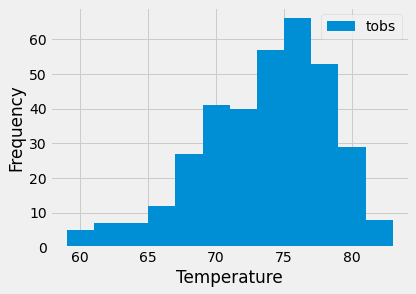

In [50]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")